<a href="https://colab.research.google.com/github/dspaulolima/Projetos/blob/master/uber_nyc/nyc_airbnb_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York Airbnb**

**Sobre Airbnb**

O Airbnb é uma empresa que opera como um serviço online de aluguél de casas, apartamentos ou quartos por agendamento durante todo o calendário. Está presente em todos os cantos do mundo e funciona oferecendo imóveis de terceiros, cadastrados no serviço, para aluguél. Dessa forma age como um intermediário entre o anfitrião e o inquilino, ganhando uma comissão por cada reserva.

Foi fundada em 2008, na cidade de São Francisco - Califórnia, por Brian Chesky, Nathan Blecharczyk e Joe Gebbia. De acordo com o próprio [site](https://news.airbnb.com/about-us/), o Airbnb é um dos maiores mercados do mundo para encontrar lugares únicos e autênticos para se hospedar e fazer várias coisas. Oferecendo mais de 7 milhões de acomodações e 50.000 atividades artesanais, todas alimentadas por anfitriões locais. Com um mecanismo de empoderamento econômico, o Airbnb ajudou milhões de empreendedores de hotelaria a monetizar seus espaços e paixões, mantendo os benefícios financeiros do turismo em suas próprias comunidades. Com mais de 750 milhões de hóspedes até o momento e acessível em 62 idiomas em mais de 220 países e regiões, o Airbnb promove conexão pessoa a pessoa, comunidade e confiança em todo o mundo.


**Sobre os dados**

*Os dados foram coletados através do repositório no Kaggle: https://bit.ly/2RMUq5K*

O dataset descreve as atividades e métricas de imóveis listados no Airbnb, em Nova Iorque, para o ano de 2019.

**Dictionary**

`id` listing ID<br>
`name` name of the listing<br>
`host_id` host ID<br>
`host_name` name of the host<br>
`neighbourhood_group` location neighbourhood area<br>
`latitude` latitude coordinates<br>
`longitude` longitude coordinates<br>
`room_type` listing space type<br>
`price` price in dollars per night<br>
`minimum_nights` amount of nights minimum<br>
`number_of_reviews` number of reviews<br>
`last_review` latest review<br>
`reviews_per_month` number of reviews per month<br>
`calculated_host_listings_count` amount of listing per host<br>
`availability_365`number of days when listing is available for booking<br>

**NEGÓCIO A SER RESOLVIDO**

Queremos explorar os dados e visualizar, principalmente, os Top10 de cada distrito com o maior número de imóveis listados.

## Importação dos pacotes e carga dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [ ]:
# Carga do dataset
airbnb = pd.read_csv("C:/ds_datasets/AB_NYC_2019.csv")

## Trabalhando com o dataset

In [ ]:
# Visualização das primeiras linhas
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

DELETAR ATRIBUTOS DESNECESSÁRIOS PARA ESTA ANÁLISE

In [ ]:
airbnb.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

INFORMAÇÕES SOBRE O DATASET

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

De acordo com as informações acima, temos:
* 48895 linhas e 13 colunas
* 3 tipos de dados, sendo:
    - 3 flutuantes
    - 6 inteiros
    - 4 objetos
* Presença de valores nulos nos atributos ``name`` e ``reviews_per_month``

Podemos notar, também, que o atributo ``host_id`` está classificado como tipo inteiro (quantitativo). Ele, na verdade, é do tipo qualitativo.

MUDANÇA DE TIPO DE DADO

In [ ]:
airbnb['host_id'] = airbnb['host_id'].astype('O')

QUANTIDADE DE VALORES NULOS

In [ ]:
airbnb.isna().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* Como ``name`` é a descrição (título) do imóvel, vamos atribuir o valor 'No_namme_added' para preencher os valores nulos.
* Vamos preencher como '0', os valores nulos do atributo ``reviews_per_month``

In [ ]:
airbnb['name'] = airbnb['name'].fillna('No_name_added')
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

QUANTIDADE DE VALORES ÚNICOS DE VARIÁVEIS QUALITATIVAS

In [ ]:
pd.DataFrame(airbnb[['host_id', 'neighbourhood', 'neighbourhood_group', 'room_type']].nunique(), columns=['Uniques']).T

host_id  neighbourhood  neighbourhood_group  room_type
Uniques    37457            221                    5          3

**Q1 - O QUE PODEMOS DESCOBRIR SOBRE OS DISTRITOS?**

Plotagem relativa aos atributos ``neighbourhood_group`` e ``room_type``.

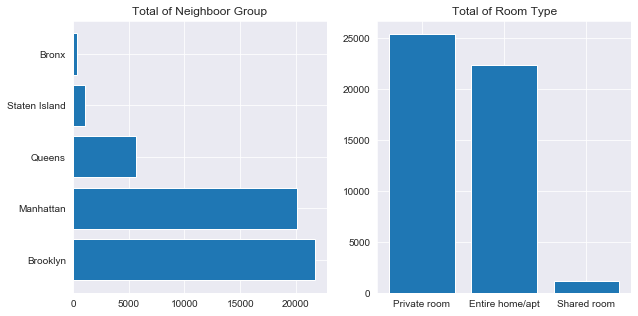

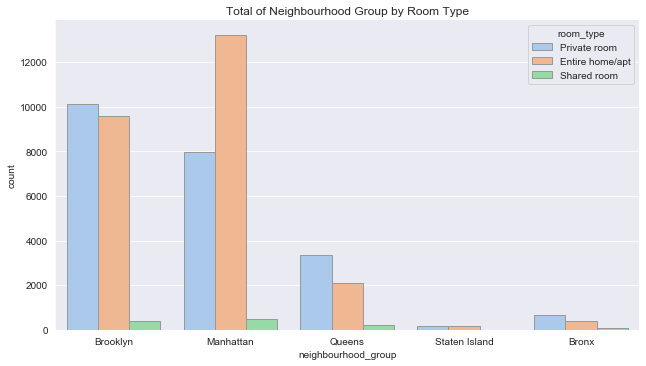

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

name_neighb_group = airbnb.neighbourhood_group.unique()
values_neighb_group = airbnb.neighbourhood_group.value_counts()

name_room_type = airbnb.room_type.unique()
values_room_type = airbnb.room_type.value_counts()

axs[0].barh(name_neighb_group, values_neighb_group)
axs[0].set_title('Total of Neighboor Group')

axs[1].bar(name_room_type, values_room_type)
axs[1].set_title('Total of Room Type')

sns.catplot(data=airbnb, x="neighbourhood_group", hue="room_type", kind="count",
            palette="pastel", edgecolor=".6", aspect=1.78, legend_out=False);
plt.title('Total of Neighbourhood Group by Room Type')

plt.show()

* Temos cinco distritos listados. São eles:
    - Bronx
    - Brooklyn
    - Queens
    - Manhattan
    - Staten Island
* Existem três modalidades de aluguél. São eles:
    - Quarto privado *(Private room)*
    - Imóvel inteiro *(Entire home/apt)*
    - Quarto compartilhado *(Shared room)*
* O local com o maior número de imóvel disponível é Brooklyn e o menor, no Bronx.
* De forma generalizada, a maior parte dos aluguéis é de quarto privado e o menor de quarto compartilhado.
* A maior locação de quartos privados é no Brooklyn; imóvel inteiro, em Manhattan; e quartos compartilhados são os menos alugados nas quatro localidades, porém não há essa tipo em Staten Island.
* Apesar de quartos privados serem os que possuem maior locação, há um destaque grande para imóveis inteiros em Manhattan *(ultrapassando as análises individuais em cada distrito por tipo de quarto)*.

**Q2 - COMO ANDAM OS PREÇOS??**

Vamos ver se existe algum imóvel com preços ZERO.

In [ ]:
airbnb[airbnb.price==0]

name    host_id  \
23161  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753                    Sunny, Quiet Room in Greenpoint    1641537   
25778      Modern apartment in the heart of Williamsburg   10132166   
25794  Spacious comfortable master bedroom with nice ...   86327101   
25795  Contemporary bedroom in brownstone with nice view   86327101   
25796       Cozy yet spacious private brownstone bedroom   86327101   
26259                              the best you can find   13709292   
26841  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866             Best Coliving space ever! Shared room.  101970559   

      neighbourhood_group       neighbourhood  latitude  longitude  \
23161            Brooklyn  Bedford-Stuyvesant  40.69023  -73.95428   
25433               Bronx     East Morrisania  40.83296  -73.88668   
25634            Brooklyn            Bushwick  40.69467  -73.92433   
25753            Brooklyn          Greenpoint  40.72462  -73.94072   
25778            Brooklyn        Williamsburg  40.70838  -73.94645   
25794            Brooklyn  Bedford-Stuyvesant  40.68173  -73.91342   
25795            Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   
25796            Brooklyn  Bedford-Stuyvesant  40.68258  -73.91284   
26259           Manhattan         Murray Hill  40.75091  -73.97597   
26841            Brooklyn            Bushwick  40.69211  -73.90670   
26866            Brooklyn            Bushwick  40.69166  -73.90928   

             room_type  price  minimum_nights  number_of_reviews  \
23161     Private room      0               4                  1   
25433     Private room      0               2                 55   
25634     Private room      0               2                 16   
25753     Private room      0               2                 12   
25778  Entire home/apt      0               5                  3   
25794     Private room      0               1                 93   
25795     Private room      0               1                 95   
25796     Private room      0               1                 95   
26259  Entire home/apt      0               3                  0   
26841      Shared room      0              30                  2   
26866      Shared room      0              30                  5   

       reviews_per_month  calculated_host_listings_count  availability_365  
23161               0.05                               4                28  
25433               2.56                               4               127  
25634               0.71                               5                 0  
25753               0.53                               2                 0  
25778               0.15                               1                73  
25794               4.28                               6               176  
25795               4.37                               6               232  
25796               4.35                               6               222  
26259               0.00                               1                 0  
26841               0.11                               6               333  
26866               0.26                               6               139

Existem 11 anfitriões com o preço de seus imóveis zerados. Isso pode indicar a simples indisponibilidade dos preços, um 'tratar com o proprietário', coleta ruim dos dados etc. Neste caso, como são poucos imóveis,os valores serão trocados pela média de acordo com o tipo de imóvel.

In [ ]:
# Média por tipo de imóvel
mean_price_private_room = round(airbnb.price[airbnb.room_type == 'Private room'].mean())
mean_price_entire_home = round(airbnb.price[airbnb.room_type == 'Entire home/apt'].mean())
mean_price_shared_room = round(airbnb.price[airbnb.room_type == 'Shared room'].mean())

# Substituição
airbnb.price[(airbnb.room_type == 'Private room') & (airbnb.price == 0)] = mean_price_private_room
airbnb.price[(airbnb.room_type == 'Entire home/apt') & (airbnb.price == 0)] = mean_price_entire_home
airbnb.price[(airbnb.room_type == 'Shared room') & (airbnb.price == 0)] = mean_price_shared_room

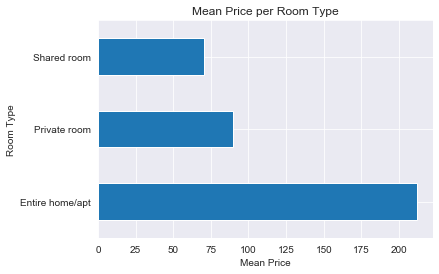

room_type
Entire home/apt    211.81
Private room        89.81
Shared room         70.25
Name: price, dtype: float64


In [ ]:
# Agrupamento por tipo de quarto, retornando preços médios.
price_mean_rooms = airbnb.groupby('room_type')['price'].agg('mean')

# Plotagem
price_mean_rooms.plot(kind='barh')
plt.title('Mean Price per Room Type')
plt.xlabel('Mean Price')
plt.ylabel('Room Type')
plt.show()

# Preços médios
print(round(airbnb.groupby('room_type')['price'].agg('mean'),2))

* Os aluguéis no tipo de locação do imóvel todo *(Entire home/apt)* possui a maior média em relação ao preço, US 211.81. Portanto são os mais caros.
* Os aluguéis em quartos compartilhados *(Shared room)* são os mais baratos em média, US 70.25.
* Os quartos compartilhados não diferenciam muito dos quartos privados, US 89.81.

In [ ]:
sns.catplot(data=airbnb, x='neighbourhood_group', y='price', hue = 'room_type', kind='bar')
plt.title('Price by Neighbourhood Group')
plt.show()
pd.DataFrame(airbnb.groupby(['neighbourhood_group','room_type'])['price'].agg('mean'))

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.926380
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.349723
                    Private room      76.553395
                    Shared room       50.866828
Manhattan           Entire home/apt  249.255171
                    Private room     116.776622
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.762456
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444

Quando se detalham os preços por tipo de quarto e em cada distrito, notamos que em qualquer lugar o preço médio dos imóveis inteiros sempre são mais caros. Ainda há uma certa similaridade quando visualizamos os quartos privados e compartilhados.

**Q3 - DISPONIBILIDADE E PREÇOS**

Plotagem da disponibilidade de imóveis para aluguél de acordo com o preço.

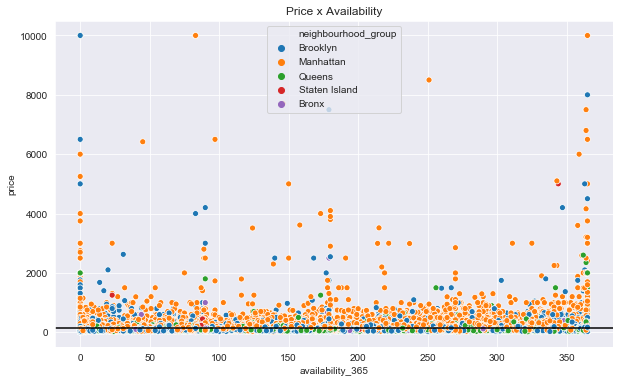

Minimum price per night: $ 10
Maximum price per night: $ 10000
Price mean per night: $ 152.75 (black line)
Total of listing lower the price mean: 34014
Total of listing upper the price mean: 14881


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=airbnb,
    x = 'availability_365', y = 'price',
    hue='neighbourhood_group'
               )
plt.title('Price x Availability')
plt.axhline(airbnb.price.mean(), c='black')

downer_mean = airbnb[airbnb.price <= airbnb.price.mean()]
upper_mean = airbnb[airbnb.price > airbnb.price.mean()]

pd.DataFrame({'Above mean price': upper_mean.count()[0], 'Under mean price': downer_mean.count()[0]}, index=['total of room type']).T.plot.barh(legend=False, figsize=(9,6))
plt.title('Total of Room type Upper/Downer the price mean')
plt.xlabel('Total')
plt.show()

print('Minimum price per night: $', airbnb.price[airbnb.price > 0].min())
print('Maximum price per night: $', airbnb.price.max())
print('Price mean per night: $', round(airbnb.price.mean(), 2), '(black line)')
print('Total of listing lower the price mean:',airbnb.price[airbnb.price <= airbnb.price.mean()].value_counts().sum())
print('Total of listing upper the price mean:',airbnb.price[airbnb.price > airbnb.price.mean()].value_counts().sum())

* Sim, não existem apenas imóveis baratos! Existe luxo.
* Por volta de 70% dos imóveis giram abaixo do preço médio de US 152.75.
* Os imóveis mais luxuosos *(e caros, por consequência)* estão em Manhattan e no Brooklyn. O mair caro está com US 10.000.

CRIANDO ESCALAS DE PREÇOS PARA DEFINIR CUSTOS BAIXO, MÉDIO, ALTO e LUXO.

In [ ]:
airbnb['price_status'] = airbnb['price'].apply(lambda i: 'low_cost' if (i > 0) & (i <= 70) else
                                                                          'medium_cost' if (i > 70) & (i <= 250) else
                                                                          'high_cost' if (i > 250) & (i <= 1000) else
                                                                          'luxe_cost')

In [ ]:
plt.figure(figsize=(8,5))
airbnb.price_status.value_counts().plot(kind='barh')
plt.title('Price Status')
plt.xlabel('Total of Price Status')
plt.show()

1. top mais avaliados
2. top menos avaliados
3. top mais caros e mais avaliados
4. top mais caros e menos avaliados
5. top mais baratos e mais avaliados
6. top mais baratos e menos avaliados

**Q4 - QUAIS OS TOP10 DE CADA DISTRITO EM RELAÇÃO À QUANTIDADE DE IMÓVEIS LISTADOS PARA ALUGUEL?**

In [ ]:
# Configuração
fig4 = plt.figure(constrained_layout=True, figsize=(10,10))
gs4 = fig4.add_gridspec(3,2)

# TOP10 TOTAL
fig4_ax1 = fig4.add_subplot(gs4[0,:1])
airbnb.host_id.value_counts().sort_values(ascending=False)[0:10].sort_values(ascending=False).plot(kind='barh')
plt.title('Top 10 - Total Neighboorhood Group')
plt.xlabel('Total of Listings')
plt.ylabel('Hosts')

# TOP10 Bronx
fig4_ax2 = fig4.add_subplot(gs4[0,1:])
airbnb.host_id[airbnb.neighbourhood_group=='Bronx'].value_counts()[0:10].sort_values(ascending=False).plot.barh()
plt.title('Top 10 - Bronx')
plt.xlabel('Total of Listings')
plt.ylabel('Hosts')

# TOP10 Brooklyn
fig4_ax3 = fig4.add_subplot(gs4[1,:1])
airbnb.host_id[airbnb.neighbourhood_group=='Brooklyn'].value_counts()[0:10].sort_values(ascending=False).plot.barh()
plt.title('Top 10 - Brooklyn')
plt.xlabel('Total of Listings')
plt.ylabel('Hosts')

# TOP10 Queens
fig4_ax4 = fig4.add_subplot(gs4[1,1:])
airbnb.host_id[airbnb.neighbourhood_group=='Queens'].value_counts()[0:10].sort_values(ascending=False).plot.barh()
plt.title('Top 10 - Queens')
plt.xlabel('Total of Listings')
plt.ylabel('Hosts')

# TOP10 Manhattan
fig4_ax5 = fig4.add_subplot(gs4[2,:1])
airbnb.host_id[airbnb.neighbourhood_group=='Manhattan'].value_counts()[0:10].sort_values(ascending=False).plot.barh()
plt.title('Top 10 - Manhattan')
plt.xlabel('Total of Listings')
plt.ylabel('Hosts')

# TOP10 Staten Island
fig4_ax6 = fig4.add_subplot(gs4[2,1:])
airbnb.host_id[airbnb.neighbourhood_group=='Staten Island'].value_counts()[0:10].sort_values(ascending=False).plot.barh()
plt.title('Top 10 - Staten Island')
plt.xlabel('Total of Listings')
plt.ylabel('Hosts')

plt.show()

* O host, na lista geral, com o maior número de imóveis listados é o *219517861* de Manhattan e o menor é o *7503643* do Brooklyn.

**Q5 - COMO OS TOP10s ESTÃO DISTRIBUÍDOS GEOGRAFICAMENTE?**

In [ ]:
### SEPARAÇÃO DOS TOP10 DE CADA DISTRITO

# Colunas para plotagem
cols = ['host_id', 'latitude', 'longitude', 'neighbourhood_group', 'price', 'price_status']

# Manhattan

Manhattan = airbnb.neighbourhood_group == 'Manhattan'

m1 = airbnb[cols][Manhattan & (airbnb.host_id == 219517861)]
m2 = airbnb[cols][Manhattan & (airbnb.host_id == 107434423)]
m3 = airbnb[cols][Manhattan & (airbnb.host_id == 30283594)]
m4 = airbnb[cols][Manhattan & (airbnb.host_id == 16098958)]
m5 = airbnb[cols][Manhattan & (airbnb.host_id == 12243051)]
m6 = airbnb[cols][Manhattan & (airbnb.host_id == 61391963)]
m7 = airbnb[cols][Manhattan & (airbnb.host_id == 22541573)]
m8 = airbnb[cols][Manhattan & (airbnb.host_id == 200380610)]
m9 = airbnb[cols][Manhattan & (airbnb.host_id == 1475015)]
m10 = airbnb[cols][Manhattan & (airbnb.host_id == 120762452)]

Manhattan10 = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10], axis=0)

# Brooklyn

Brooklyn = airbnb.neighbourhood_group == 'Brooklyn'

b1 = airbnb[cols][Brooklyn & (airbnb.host_id == 7503643)]
b2 = airbnb[cols][Brooklyn & (airbnb.host_id == 26377263)]
b3 = airbnb[cols][Brooklyn & (airbnb.host_id == 119669058)]
b4 = airbnb[cols][Brooklyn & (airbnb.host_id == 417504)]
b5 = airbnb[cols][Brooklyn & (airbnb.host_id == 226410657)]
b6 = airbnb[cols][Brooklyn & (airbnb.host_id == 230192510)]
b7 = airbnb[cols][Brooklyn & (airbnb.host_id == 213781715)]
b8 = airbnb[cols][Brooklyn & (airbnb.host_id == 16437254)]
b9 = airbnb[cols][Brooklyn & (airbnb.host_id == 9864136)]
b10 = airbnb[cols][Brooklyn & (airbnb.host_id == 159091490)]

Brooklyn10 = pd.concat([b1,b2,b3,b4,b5,b6,b7,b8,b9,b10], axis=0)

# Queens

Queens = airbnb.neighbourhood_group == 'Queens'

q1 = airbnb[cols][Queens & (airbnb.host_id == 137358866)]
q2 = airbnb[cols][Queens & (airbnb.host_id == 19303369)]
q3 = airbnb[cols][Queens & (airbnb.host_id == 242962235)]
q4 = airbnb[cols][Queens & (airbnb.host_id == 134184451)]
q5 = airbnb[cols][Queens & (airbnb.host_id == 3250450)]
q6 = airbnb[cols][Queens & (airbnb.host_id == 5962328)]
q7 = airbnb[cols][Queens & (airbnb.host_id == 200239515)]
q8 = airbnb[cols][Queens & (airbnb.host_id == 175730239)]
q9 = airbnb[cols][Queens & (airbnb.host_id == 65809485)]
q10 = airbnb[cols][Queens & (airbnb.host_id == 120767920)]

Queens10 = pd.concat([q1,q2,q3,q4,q5,q6,q7,q8,q9,q10], axis=0)

# Staten Island
                    
StatenIsland = airbnb.neighbourhood_group == 'Staten Island'
                    
s1 = airbnb[cols][StatenIsland & (airbnb.host_id == 104812805)]
s2 = airbnb[cols][StatenIsland & (airbnb.host_id == 50756378)]
s3 = airbnb[cols][StatenIsland & (airbnb.host_id == 137999892)]
s4 = airbnb[cols][StatenIsland & (airbnb.host_id == 104927746)]
s5 = airbnb[cols][StatenIsland & (airbnb.host_id == 117492425)]
s6 = airbnb[cols][StatenIsland & (airbnb.host_id == 303939)]
s7 = airbnb[cols][StatenIsland & (airbnb.host_id == 99202586)]
s8 = airbnb[cols][StatenIsland & (airbnb.host_id == 92493393)]
s9 = airbnb[cols][StatenIsland & (airbnb.host_id == 43392243)]
s10 = airbnb[cols][StatenIsland & (airbnb.host_id == 1360198)]

StatenIsland10 = pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10], axis=0)

# Bronx
                    
Bronx = airbnb.neighbourhood_group == 'Bronx'
                    
x1 = airbnb[cols][Bronx & (airbnb.host_id == 310670)]
x2 = airbnb[cols][Bronx & (airbnb.host_id == 23878336)]
x3 = airbnb[cols][Bronx& (airbnb.host_id == 35783912)]
x4 = airbnb[cols][Bronx & (airbnb.host_id == 30509656)]
x5 = airbnb[cols][Bronx & (airbnb.host_id == 295128)]
x6 = airbnb[cols][Bronx & (airbnb.host_id == 273354185)]
x7 = airbnb[cols][Bronx & (airbnb.host_id == 2988712)]
x8 = airbnb[cols][Bronx & (airbnb.host_id == 174785358)]
x9 = airbnb[cols][Bronx & (airbnb.host_id == 32164030)]
x10 = airbnb[cols][Bronx & (airbnb.host_id == 152246149)]

Bronx10 = pd.concat([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10], axis=0)

In [ ]:
# Junção dos top10s de cada distrito
top10s = pd.concat([Bronx10,Brooklyn10,Manhattan10,Queens10,StatenIsland10], axis=0)

In [ ]:
## Novos atributos para auxílio na plotagem geográfica

# Cores
top10s['colors'] = top10s['neighbourhood_group'].apply(lambda x: 'lightblue' if x == 'Brooklyn' else
                                                                          'lightgreen' if x == 'Manhattan' else
                                                                          'orange' if x == 'Bronx' else
                                                                          'red' if x == 'Queens' else
                                                                          'magenta')

# Tamanho
top10s['size'] = top10s['price_status'].apply(lambda x: 10 if x == 'luxe_cost' else
                                                                          6 if x == 'high_cost' else
                                                                          4 if x == 'medium_cost' else
                                                                          2)

In [ ]:
# Configuração do mapa
geomap = folium.Map(location=[40.72756, -73.9423], zoom_start = 11.5, tiles = "cartodbpositron")

for lat, lon, price, status, city, size, colors in zip(top10s['latitude'], top10s['longitude'],
                                              top10s['price'],top10s['price_status'], top10s['neighbourhood_group'],
                                                      top10s['size'], top10s['colors']):
    folium.CircleMarker(
        [lat,lon],
        radius=size,
        popup= (
            'City:' + str(city).capitalize() + '<br>'
            'Price:' + str(price) + '<br>'
            'Status:' + str(status)
               ),
        color=colors,
        key_on=city,
#         fill_color=colors,
        fill=True,
        fill_opacity=0.7        
    ).add_to(geomap)

# Plotagem
geomap

Aqui estão os Top10 de cada distrito separados por cores.

* Bronx: laranja.
* Brooklyn: azul.
* Queens: vermelho.
* Manhattan: verde.
* Staten Island: rosa.

AGRUPAMENTO DOS TOP10s

In [ ]:
# Variáveis
latitude = top10s['latitude']
longitude = top10s['longitude']
station = top10s['neighbourhood_group']

# Configuração para a plotagem
geomap2 = folium.Map(location=[40.72756, -73.9423], zoom_start = 11,tiles='cartodbpositron')
marker_cluster = MarkerCluster().add_to(geomap2)

for latitude, longitude, station in zip(latitude, longitude, station):
    folium.Marker(location=[latitude, longitude], popup=str(station)).add_to(marker_cluster)

# Plotagem
geomap2